# 🎨 **1. Start with a probability density curve**

Imagine a simple distribution — say a bell-shaped curve or even a skewed one. Call it $f(x)$.

Visually:

- The **height** of the curve at $x$ tells you how likely that value is.
- The **area** under the curve is 1.

This is your baseline distribution.

---

# 🔥 **2. Multiply the curve by $e^{t x}$**

Now imagine taking every point on the curve and multiplying it by the factor:

$$
e^{t x}.
$$

This is the exponential tilt.

### What does this do visually?

### If $t > 0$:
- The right tail gets **pulled upward**.
- The left tail gets **pushed downward**.
- The whole distribution **leans to the right**.

### If $t < 0$:
- The left tail gets **pulled upward**.
- The right tail gets **pushed downward**.
- The distribution **leans to the left**.

It’s literally like grabbing the curve and tilting it.

---

# 📐 **3. Renormalize to make it a probability distribution**

After tilting, the area under the curve is no longer 1.  
So we divide by the moment generating function:

$$
M_X(t) = \mathbb{E}[e^{tX}].
$$

This rescales the tilted curve back into a proper probability density.

### Visually:
- You tilt the curve.
- Then you “squish” or “stretch” it vertically so the total area is 1 again.

This new curve is the **exponentially tilted distribution**.

---

# 🎯 **4. What the tilted distribution looks like**

Let’s imagine a right-skewed distribution (like an exponential).  
Here’s what happens:

### For $t > 0$:
- The right tail becomes **much heavier**.
- The peak shifts **to the right**.
- The distribution becomes **more spread out**.

### For $t < 0$:
- The left side becomes more prominent.
- The peak shifts **to the left**.
- The right tail becomes thinner.

It’s like adjusting the “brightness” of different parts of the distribution.

---

# 🧠 **5. Why this matters**

This visual tilting explains:

### **MGFs**
$$
M_X(t) = \mathbb{E}[e^{tX}]
$$
is literally the *normalizing constant* needed to turn the tilted curve into a probability distribution.

### **Cumulant generating functions**
$$
\Lambda(t) = \log M_X(t)
$$
describe how the distribution changes under tilting.

### **Large deviations**
The rate function is the Legendre transform of $\Lambda(t)$.  
This comes from analyzing how the distribution behaves when you tilt it.

### **Central Limit Theorem**
MGFs show how sums of random variables behave under repeated tilting.

---

# 🌄 **6. The most intuitive picture**

Here’s the cleanest visual metaphor:

> **Exponential tilting is like shining a spotlight on one side of the distribution.  
> Positive $t$ brightens the right side; negative $t$ brightens the left.  
> Then you renormalize the brightness so the total light stays the same.**

This is exactly what the MGF measures.

---

# 🧭 If you want, I can also show you:
- a step-by-step visual example with a normal distribution  
- how tilting changes the mean and variance  
- how tilting relates to entropy and KL divergence  
- how exponential tilting appears in the proof of the CLT  
- how to compute the tilted distribution for any $X$

Just tell me which direction you want to explore next.

---

# Plot

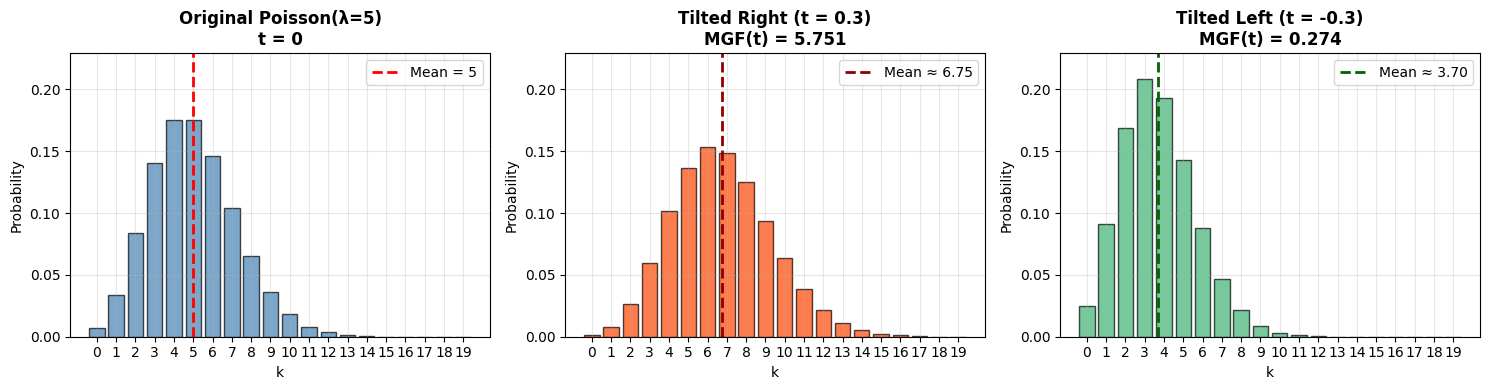

Original mean: 5
Tilted right (t=0.3) mean: 6.749
Tilted left (t=-0.3) mean: 3.704


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Poisson parameter
lambda_param = 5

# Range of values
k_values = np.arange(0, 20)

# Original Poisson PMF
pmf_original = poisson.pmf(k_values, lambda_param)

# Tilting parameters
t_positive = 0.3
t_negative = -0.3

# MGF for Poisson: M(t) = exp(λ(e^t - 1))
def poisson_mgf(t, lam):
    return np.exp(lam * (np.exp(t) - 1))

# Exponentially tilted PMF: P_t(k) = e^(tk) * P(k) / M(t)
def tilted_pmf(k, pmf, t, lam):
    mgf_t = poisson_mgf(t, lam)
    return np.exp(t * k) * pmf / mgf_t

# Compute tilted PMFs
pmf_positive = tilted_pmf(k_values, pmf_original, t_positive, lambda_param)
pmf_negative = tilted_pmf(k_values, pmf_original, t_negative, lambda_param)

# Find max probability for consistent y-axis
max_prob = max(pmf_original.max(), pmf_positive.max(), pmf_negative.max())

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original distribution
axes[0].bar(k_values, pmf_original, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(lambda_param, color='red', linestyle='--', linewidth=2, label=f'Mean = {lambda_param}')
axes[0].set_title(f'Original Poisson(λ={lambda_param})\nt = 0', fontsize=12, fontweight='bold')
axes[0].set_xlabel('k')
axes[0].set_xticks(k_values)
axes[0].set_ylabel('Probability')
axes[0].set_ylim(0, max_prob * 1.1)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Tilted with t > 0 (shift right)
mean_positive = np.sum(k_values * pmf_positive)
axes[1].bar(k_values, pmf_positive, color='orangered', alpha=0.7, edgecolor='black')
axes[1].axvline(mean_positive, color='darkred', linestyle='--', linewidth=2, label=f'Mean ≈ {mean_positive:.2f}')
axes[1].set_title(f'Tilted Right (t = {t_positive})\nMGF(t) = {poisson_mgf(t_positive, lambda_param):.3f}', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('k')
axes[1].set_xticks(k_values)
axes[1].set_ylabel('Probability')
axes[1].set_ylim(0, max_prob * 1.1)
axes[1].legend()
axes[1].grid(alpha=0.3)

# Tilted with t < 0 (shift left)
mean_negative = np.sum(k_values * pmf_negative)
axes[2].bar(k_values, pmf_negative, color='mediumseagreen', alpha=0.7, edgecolor='black')
axes[2].axvline(mean_negative, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean ≈ {mean_negative:.2f}')
axes[2].set_title(f'Tilted Left (t = {t_negative})\nMGF(t) = {poisson_mgf(t_negative, lambda_param):.3f}', 
                  fontsize=12, fontweight='bold')
axes[2].set_xlabel('k')
axes[2].set_xticks(k_values)
axes[2].set_ylabel('Probability')
axes[2].set_ylim(0, max_prob * 1.1)
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Original mean: {lambda_param}")
print(f"Tilted right (t={t_positive}) mean: {mean_positive:.3f}")
print(f"Tilted left (t={t_negative}) mean: {mean_negative:.3f}")